In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

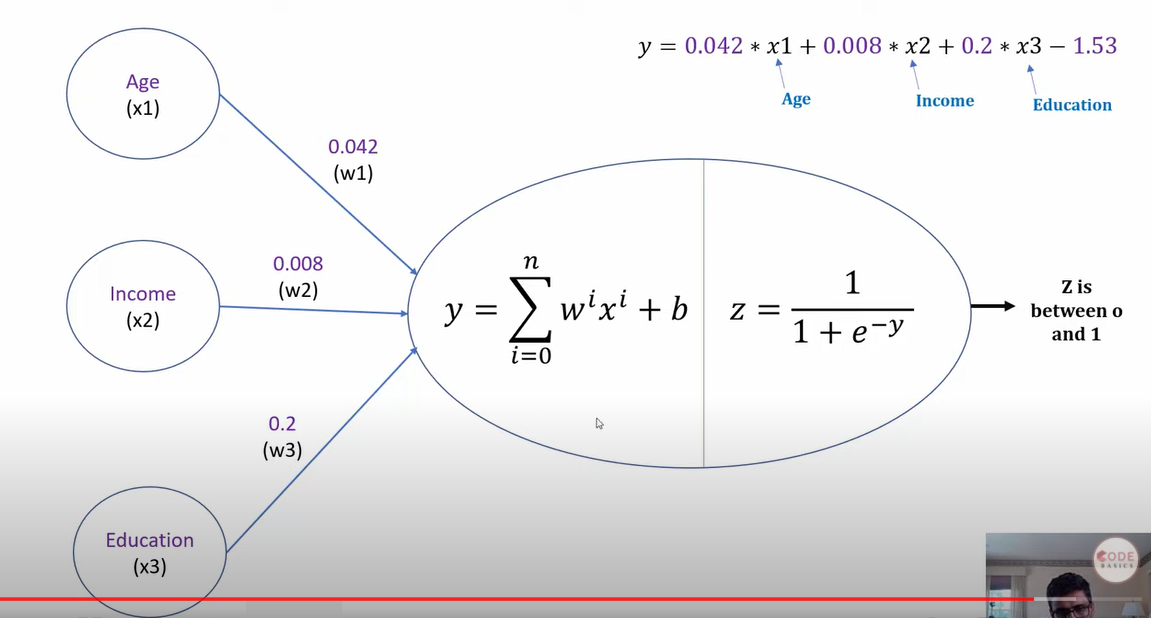

## Dowloading train and test dataset from keras

In [2]:
(x_train, y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


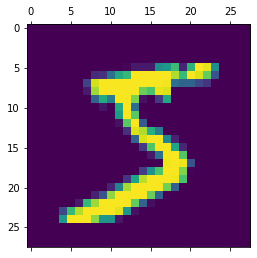

In [5]:
plt.matshow(x_train[0])

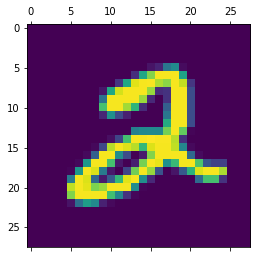

In [6]:
plt.matshow(x_train[5])

In [ ]:
x_train[0]

In [8]:
x_train_flattened=x_train.reshape(len(x_train),(28*28))
x_train_flattened=x_train_flattened/255

In [9]:
x_test_flattened=x_test.reshape(len(x_test),(28*28))
x_train_flattened=x_train_flattened/255

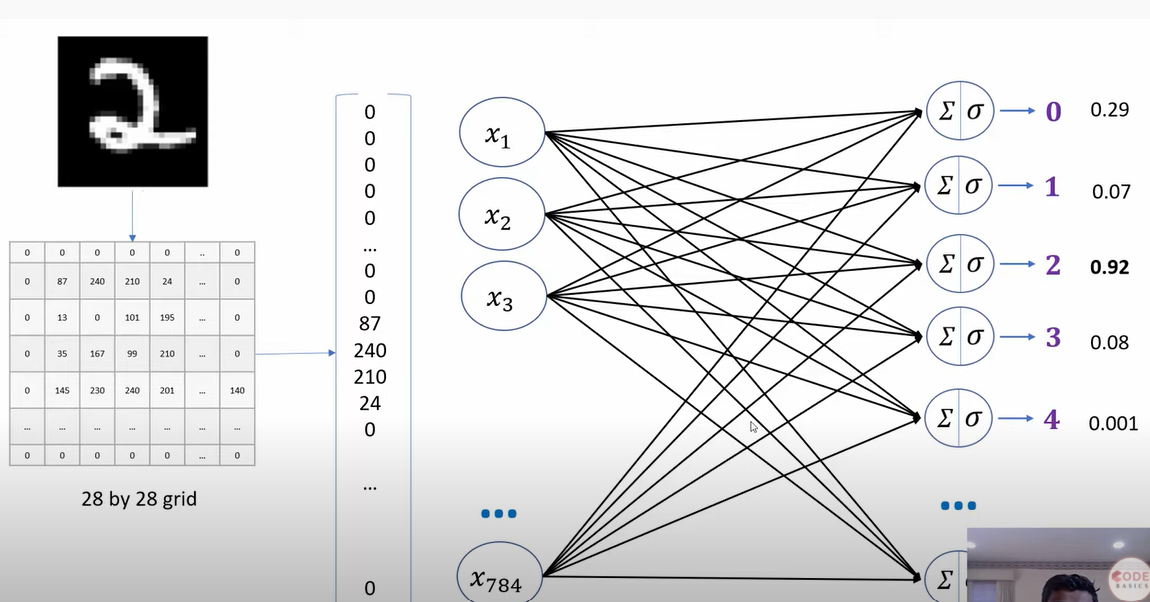

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
      ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 845us/step - loss: 2.1885 - accuracy: 0.5732
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9774 - accuracy: 0.7058
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7908 - accuracy: 0.7422
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6268 - accuracy: 0.7598
Epoch 5/20
1875/1875 [==============================] - 2s 990us/step - loss: 1.4839 - accuracy: 0.7751
Epoch 6/20
1875/1875 [==============================] - 2s 928us/step - loss: 1.3600 - accuracy: 0.7881
Epoch 7/20
1875/1875 [==============================] - 2s 848us/step - loss: 1.2532 - accuracy: 0.7984
Epoch 8/20
1875/1875 [==============================] - 2s 928us/step - loss: 1.1612 - accuracy: 0.80720s - loss:
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0821 - accuracy: 0.8151: 0s - loss: 1.0871 - accu
Epoch 10/20
1875/1875 [=============

In [11]:
y_test_ptedicted=model.predict(x_test_flattened)

In [12]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18192.5703 - accuracy: 0.7288


[18192.5703125, 0.7287999987602234]

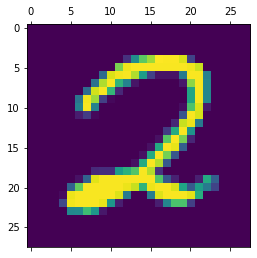

In [13]:
plt.matshow(x_test[35])

In [15]:
np.argmax(y_test_ptedicted[35])

0

In [16]:
y_test_ptedicted_label=[np.argmax(i) for i in y_test_ptedicted]

In [17]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_test_ptedicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[974,   0,   2,   3,   0,   0,   1,   0,   0,   0],
       [  1, 981,  79,  58,   0,   3,   4,   0,   9,   0],
       [273,   0, 738,   3,   7,   0,   4,   3,   4,   0],
       [372,   0, 243, 383,   2,   0,   0,   6,   4,   0],
       [109,   0,  90,  62, 671,   0,  15,   3,  32,   0],
       [627,   1,  34, 114,   6,  63,   8,   2,  37,   0],
       [437,   2, 409,  15,   5,   2,  88,   0,   0,   0],
       [155,   5, 129, 158,  57,   2,   2, 510,  10,   0],
       [147,   1, 190, 258,  12,  11,  18,  15, 322,   0],
       [110,   2,  34, 139, 500,   5,   2,  83, 130,   4]])>

Text(69.0, 0.5, 'Truth')

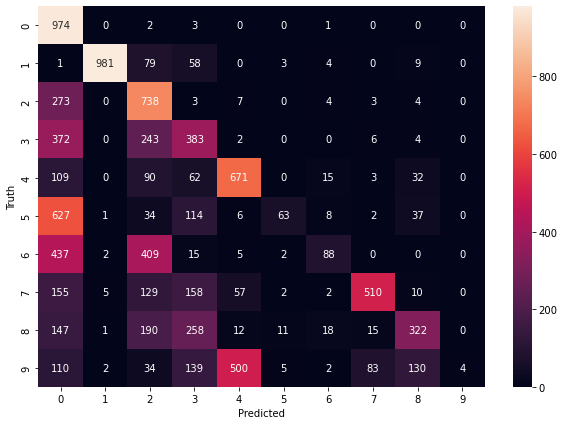

In [18]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Adding Hidden layer

In [19]:
model=keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
     ])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7885 - accuracy: 0.7984
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3397 - accuracy: 0.9023
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2919 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2627 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2377 - accuracy: 0.9311


In [20]:
y_test_ptedicted=model.predict(x_test_flattened)
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 10451.5176 - accuracy: 0.9011


[10451.517578125, 0.9010999798774719]

In [21]:
y_test_ptedicted_label=[np.argmax(i) for i in y_test_ptedicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_test_ptedicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    2,    0,    0,    2,    0,    4,    0],
       [   1, 1084,    7,    1,    0,    1,    3,    1,   37,    0],
       [  36,    7,  944,    5,    9,    0,    0,    7,   22,    2],
       [  18,    0,   60,  891,    0,    1,    0,    6,   33,    1],
       [  16,    0,    3,    0,  937,    0,    5,    0,   11,   10],
       [  67,    2,    3,   97,   20,  580,   10,    4,  101,    8],
       [  36,    2,   24,    0,   63,    4,  819,    0,   10,    0],
       [  18,    3,   52,   89,   19,    0,    0,  825,    6,   16],
       [  15,    2,    9,   20,    8,    2,    8,    5,  905,    0],
       [  21,    3,    0,   11,  110,    0,    0,   31,   69,  764]])>

Text(69.0, 0.5, 'Truth')

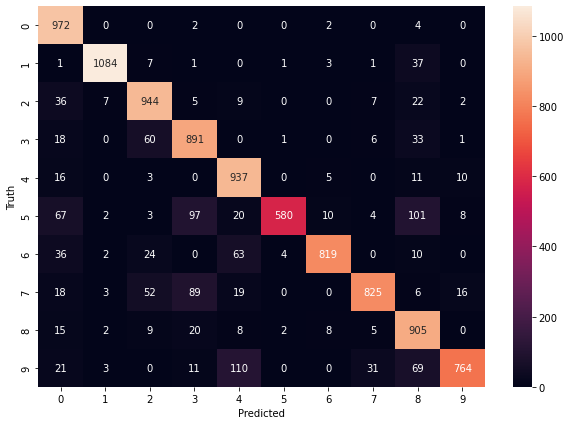

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [23]:
y_test_ptedicted_label[15:30]

[5, 9, 3, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]

In [24]:
y_test[15:30]

array([5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1], dtype=uint8)

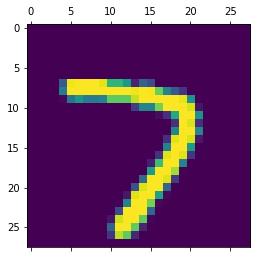

In [25]:
plt.matshow(x_test[17])

## No need to Flatten array 

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
     ])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 4.1462 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9397 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7207 - accuracy: 0.9651
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5920 - accuracy: 0.9706
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5606 - accuracy: 0.9743
